In [50]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tool
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [51]:
#read
CPBL_data = pd.read_excel("CPBL_batter.xlsx")
MLB_data = pd.read_excel("MLB_batter.xlsx")


In [52]:
#first view
CPBL_data.info()
CPBL_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   球員      163 non-null    object 
 1   隊伍      163 non-null    object 
 2   背號      163 non-null    int64  
 3   PA      163 non-null    int64  
 4   AVG     163 non-null    float64
 5   OBP     163 non-null    float64
 6   SLG     163 non-null    float64
 7   ISO     163 non-null    float64
 8   BABIP   161 non-null    float64
 9   BIP%    163 non-null    float64
 10  OPS     163 non-null    float64
 11  OPS+    163 non-null    float64
 12  tOPS+   163 non-null    float64
 13  RC      163 non-null    float64
 14  wOBA    163 non-null    float64
 15  BB%     163 non-null    float64
 16  BB/K    160 non-null    float64
 17  K%      163 non-null    float64
dtypes: float64(14), int64(2), object(2)
memory usage: 23.1+ KB


背號          PA         AVG         OBP         SLG         ISO  \
count  163.000000  163.000000  163.000000  163.000000  163.000000  163.000000   
mean    40.975460  154.601227    0.214258    0.269252    0.286196    0.071920   
std     29.859124  146.695601    0.109310    0.117175    0.148641    0.066956   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.500000   18.500000    0.170000    0.240000    0.210000    0.020000   
50%     37.000000  107.000000    0.240000    0.300000    0.310000    0.060000   
75%     65.000000  276.000000    0.276500    0.330000    0.360000    0.110000   
max     99.000000  491.000000    1.000000    1.000000    1.000000    0.333000   

            BABIP        BIP%         OPS        OPS+       tOPS+          RC  \
count  161.000000  163.000000  163.000000  163.000000  163.000000  163.000000   
mean     0.266832   68.824540    0.554908   63.321472   63.311656   16.058896   
std      0.129134   15.231968    0.256099   75.013732   74.831029   18.639639   
min      0.000000    0.000000    0.000000 -100.000000 -100.000000    0.000000   
25%      0.230000   64.850000    0.460000   36.850000   34.850000    0.800000   
50%      0.280000   71.400000    0.610000   79.800000   78.800000    7.100000   
75%      0.320000   76.850000    0.695000  104.550000  103.450000   27.900000   
max      1.000000  100.000000    2.000000  490.100000  481.300000   74.600000   

             wOBA         BB%      BB/K          K%  
count  163.000000  163.000000  160.0000  163.000000  
mean     0.251043    6.357055       inf   22.444172  
std      0.107856    5.750287       NaN   15.289842  
min      0.000000    0.000000    0.0000    0.000000  
25%      0.210000    3.000000    0.1400   14.700000  
50%      0.280000    6.200000    0.3300   19.400000  
75%      0.310000    8.600000    0.5125   25.050000  
max      0.810000   50.000000       inf  100.000000

In [53]:
MLB_data.info()
MLB_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    145 non-null    object 
 1   Team    145 non-null    object 
 2   G       145 non-null    int64  
 3   PA      145 non-null    int64  
 4   HR      145 non-null    int64  
 5   R       145 non-null    int64  
 6   RBI     145 non-null    int64  
 7   SB      145 non-null    int64  
 8   BB%     145 non-null    float64
 9   K%      145 non-null    float64
 10  ISO     145 non-null    float64
 11  BABIP   145 non-null    float64
 12  AVG     145 non-null    float64
 13  OBP     145 non-null    float64
 14  SLG     145 non-null    float64
 15  wOBA    145 non-null    float64
 16  xwOBA   145 non-null    float64
 17  wRC+    145 non-null    int64  
 18  BsR     145 non-null    float64
 19  Off     145 non-null    float64
 20  Def     145 non-null    float64
 21  WAR     145 non-null    float64
dtypes:

G          PA          HR           R         RBI          SB  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean   145.958621  605.489655   21.855172   76.813793   74.372414   12.531034   
std     11.155390   64.557050   10.440293   17.756058   19.681825   10.712827   
min    118.000000  502.000000    3.000000   45.000000   23.000000    0.000000   
25%    138.000000  547.000000   15.000000   63.000000   61.000000    4.000000   
50%    147.000000  592.000000   20.000000   74.000000   74.000000   10.000000   
75%    156.000000  655.000000   27.000000   87.000000   86.000000   20.000000   
max    163.000000  732.000000   60.000000  146.000000  132.000000   44.000000   

              BB%          K%         ISO       BABIP         AVG         OBP  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.088648    0.204248    0.178338    0.295793    0.258483    0.330076   
std      0.030633    0.056750    0.054125    0.026799    0.022535    0.029651   
min      0.025000    0.031000    0.067000    0.243000    0.200000    0.268000   
25%      0.064000    0.167000    0.135000    0.279000    0.241000    0.311000   
50%      0.087000    0.204000    0.173000    0.295000    0.257000    0.329000   
75%      0.109000    0.252000    0.209000    0.314000    0.272000    0.350000   
max      0.183000    0.323000    0.357000    0.376000    0.331000    0.457000   

              SLG        wOBA       xwOBA        wRC+         BsR         Off  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.436814    0.331400    0.342186  112.572414    0.443448   10.093103   
std      0.059814    0.029586    0.031667   21.039891    3.310459   16.244228   
min      0.306000    0.263000    0.279000   65.000000   -6.100000  -24.600000   
25%      0.394000    0.311000    0.321000   99.000000   -1.700000   -0.600000   
50%      0.433000    0.332000    0.339000  113.000000   -0.300000    8.900000   
75%      0.475000    0.349000    0.359000  125.000000    2.600000   19.200000   
max      0.688000    0.463000    0.477000  204.000000   10.300000   79.400000   

              Def         WAR  
count  145.000000  145.000000  
mean    -2.304828    2.888966  
std      9.912067    1.922676  
min    -19.500000   -0.600000  
25%    -10.300000    1.400000  
50%     -2.700000    2.900000  
75%      4.800000    3.800000  
max     24.500000   10.100000

In [54]:
df = pd.concat([MLB_data, CPBL_data], axis=0, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    145 non-null    object 
 1   Team    145 non-null    object 
 2   G       145 non-null    float64
 3   PA      308 non-null    int64  
 4   HR      145 non-null    float64
 5   R       145 non-null    float64
 6   RBI     145 non-null    float64
 7   SB      145 non-null    float64
 8   BB%     308 non-null    float64
 9   K%      308 non-null    float64
 10  ISO     308 non-null    float64
 11  BABIP   306 non-null    float64
 12  AVG     308 non-null    float64
 13  OBP     308 non-null    float64
 14  SLG     308 non-null    float64
 15  wOBA    308 non-null    float64
 16  xwOBA   145 non-null    float64
 17  wRC+    145 non-null    float64
 18  BsR     145 non-null    float64
 19  Off     145 non-null    float64
 20  Def     145 non-null    float64
 21  WAR     145 non-null    float64
 22  球員

In [55]:
#check column
same_col = set(CPBL_data.columns) & set(MLB_data.columns)
diff_col = set(CPBL_data.columns) ^ set(MLB_data.columns)
print("same column: ", same_col, "\ndiff. column: ", diff_col)


same column:  {'SLG', 'BB%', 'PA', 'BABIP', 'K%', 'OBP', 'ISO', 'wOBA', 'AVG'} 
diff. column:  {'R', 'BB/K', '隊伍', 'tOPS+', 'RBI', 'WAR', 'wRC+', 'BsR', 'Name', 'Def', 'xwOBA', 'BIP%', '背號', 'OPS+', 'Team', 'OPS', 'Off', 'RC', 'SB', '球員', 'G', 'HR'}


In [56]:
#data clean
Scale = 1.232
CPBL_data.drop(columns=['BB/K','OPS','tOPS+','RC'], inplace=True)
MLB_data.drop(columns=['G','WAR','xwOBA','Def','SB'], inplace=True)
MLB_data['OPS+'] = 100 * (MLB_data['OBP']/MLB_data['OBP'].mean() + (MLB_data['SLG']/MLB_data['SLG'].mean()) - 1)
CPBL_data['Off'] = ((CPBL_data['wOBA'] - CPBL_data['wOBA'].mean()) / Scale) * 100
CPBL_data.rename(columns={
    '球員': 'Name',
    '背號': 'Num',
    '隊伍': 'Team'
}, inplace=True)
MLB_data[['K%', 'BB%']] = MLB_data[['K%', 'BB%']] * 100

df = pd.concat([MLB_data, CPBL_data], axis=0, ignore_index=True)
df = df[df['PA'] > 20]
Scale = 600
df['HR_scaled'] = df['HR'] * Scale / df['PA']
df['R_scaled'] = df['R'] * Scale / df['PA']
df['RBI_scaled'] = df['RBI'] * Scale / df['PA']
df.drop(columns=['HR','R','RBI'], inplace=True)

In [57]:
oe = OrdinalEncoder()
df['Num_Ordi'] = oe.fit_transform(df[['Num']])
df['Team_Ordi'] = oe.fit_transform(df[['Team']])

'''df['Num_Bi'] = df['Num_Ordi'].apply(tool.custom_binary_encode)
df['Team_Bi'] = df['Team_Ordi'].apply(tool.custom_binary_encode)'''
df.head()

Name Team   PA   BB%    K%    ISO  BABIP    AVG    OBP    SLG  \
0      Aaron Judge  NYY  679  18.3  23.6  0.357  0.376  0.331  0.457  0.688   
1      Cal Raleigh  SEA  705  13.8  26.7  0.342  0.248  0.247  0.359  0.589   
2   Bobby Witt Jr.  KCR  687   7.1  18.2  0.205  0.334  0.295  0.351  0.501   
3    Shohei Ohtani  LAD  727  15.0  25.7  0.340  0.315  0.282  0.392  0.622   
4  Geraldo Perdomo  ARI  720  13.1  11.5  0.173  0.303  0.290  0.389  0.462   

   ...  BsR   Off        OPS+  Num  BIP%  HR_scaled    R_scaled  RBI_scaled  \
0  ... -4.2  79.4  195.957204  NaN   NaN  46.833579  121.060383  100.736377   
1  ... -2.7  48.0  143.602940  NaN   NaN  51.063830   93.617021  106.382979   
2  ...  7.4  31.5  121.033371  NaN   NaN  20.087336   86.462882   76.855895   
3  ...  3.7  66.0  161.155348  NaN   NaN  45.392022  120.495186   84.181568   
4  ...  3.8  36.2  123.617586  NaN   NaN  16.666667   81.666667   83.333333   

   Num_Ordi  Team_Ordi  
0       NaN       20.0  
1       NaN       24.0  
2       NaN       13.0  
3       NaN       15.0  
4       NaN        1.0  

[5 rows x 22 columns]

In [58]:
num_col = df.select_dtypes(include=[np.number]).columns
df_num = df[num_col]
df_num.drop(columns= ['Num','Num_Ordi','Team_Ordi'], inplace = True)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 304
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PA          265 non-null    int64  
 1   BB%         265 non-null    float64
 2   K%          265 non-null    float64
 3   ISO         265 non-null    float64
 4   BABIP       265 non-null    float64
 5   AVG         265 non-null    float64
 6   OBP         265 non-null    float64
 7   SLG         265 non-null    float64
 8   wOBA        265 non-null    float64
 9   wRC+        145 non-null    float64
 10  BsR         145 non-null    float64
 11  Off         265 non-null    float64
 12  OPS+        265 non-null    float64
 13  BIP%        120 non-null    float64
 14  HR_scaled   145 non-null    float64
 15  R_scaled    145 non-null    float64
 16  RBI_scaled  145 non-null    float64
dtypes: float64(16), int64(1)
memory usage: 37.3 KB


C:\Users\nnn60\AppData\Local\Temp\ipykernel_9468\720562906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(columns= ['Num','Num_Ordi','Team_Ordi'], inplace = True)


In [59]:
df_num["CPBL_NaN"] = False
df_num.loc[df_num["HR_scaled"].isnull() == True, "CPBL_NaN"] = True

C:\Users\nnn60\AppData\Local\Temp\ipykernel_9468\1500070344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num["CPBL_NaN"] = False


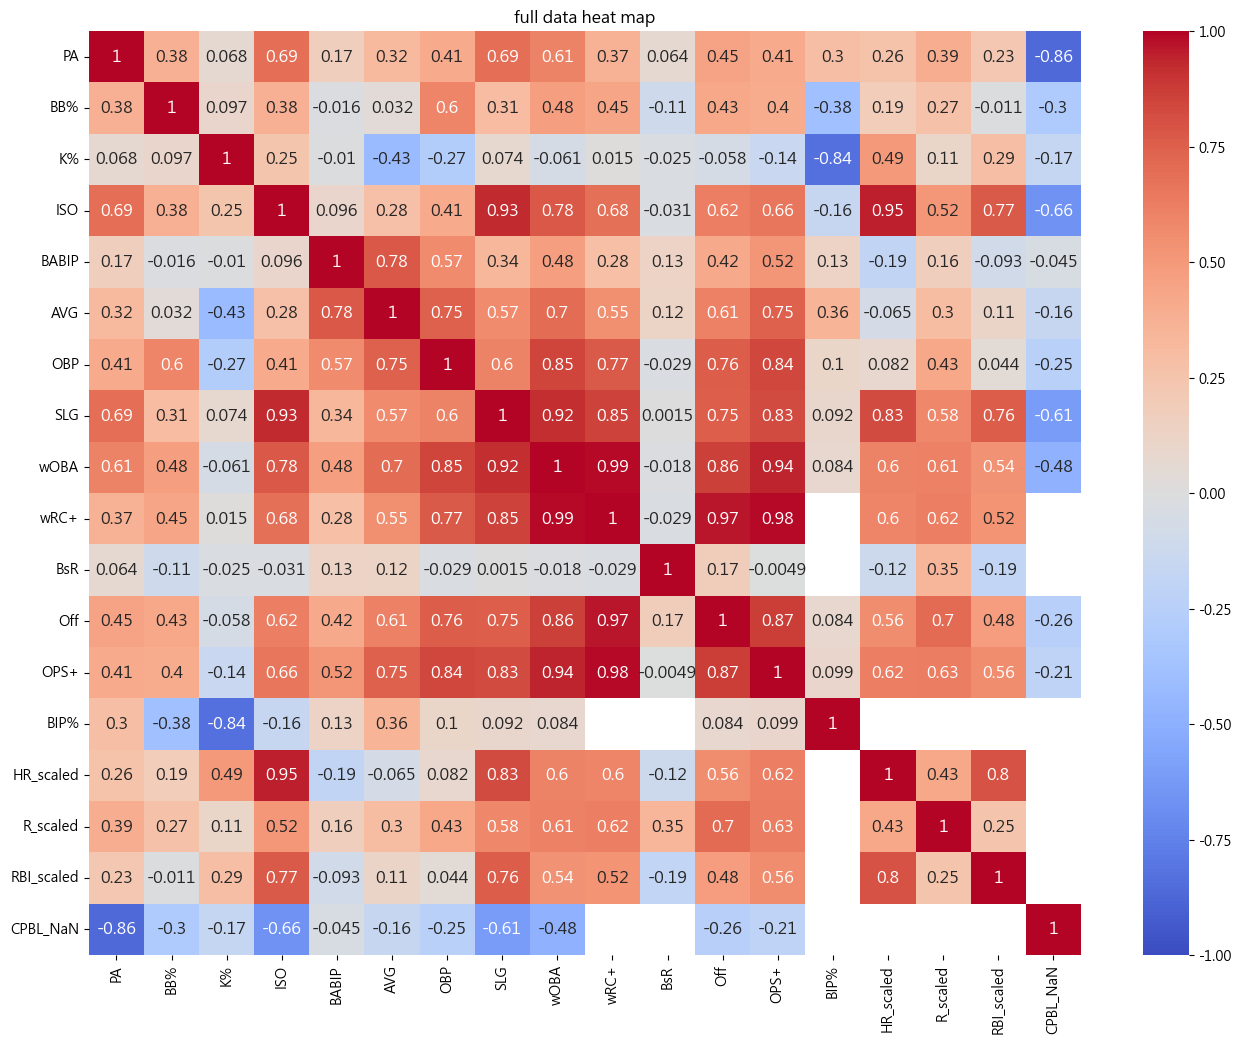

In [60]:
tool.plot_heatmap(df_num, 'full data heat map')

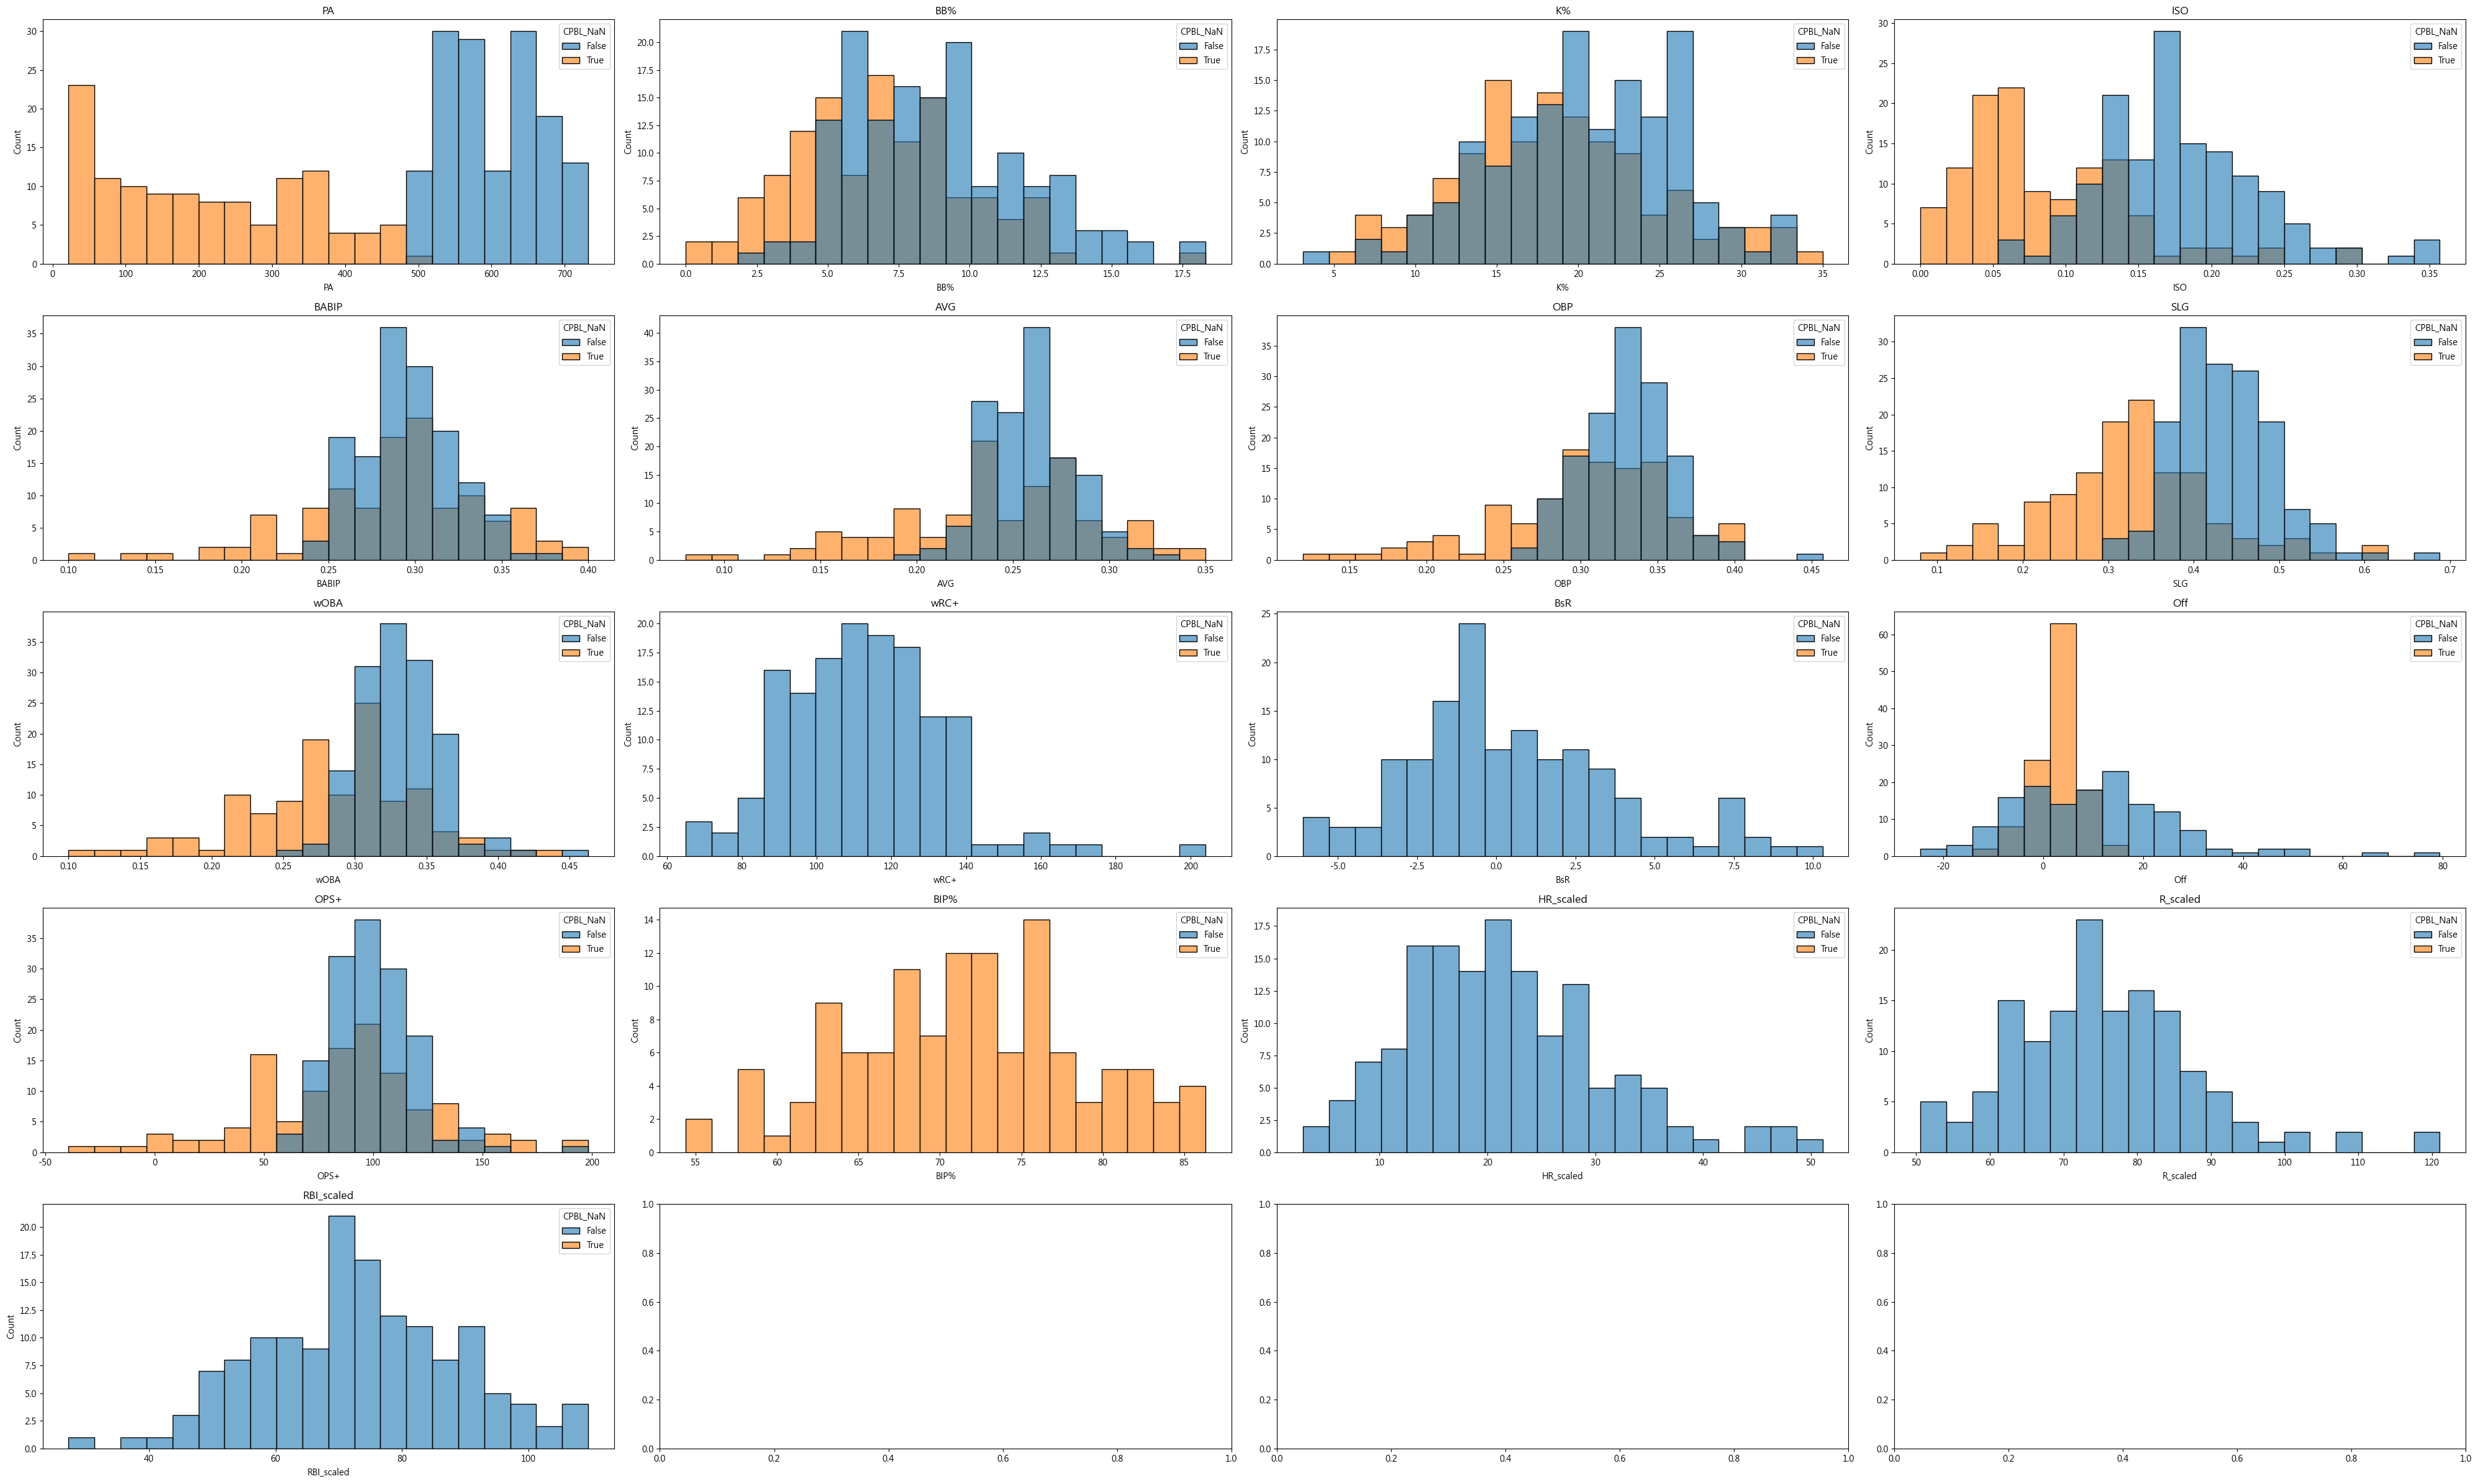

<Figure size 640x480 with 0 Axes>

In [61]:
col = [c for c in df_num.columns if c != 'CPBL_NaN']

fig, axes = plt.subplots(5, 4, figsize=(40, 24))
axes = axes.flatten()

for i, c in enumerate(col):
    sns.histplot(data=df_num, x=c, hue='CPBL_NaN', bins=20, alpha=0.6, ax=axes[i])
    axes[i].set_title(c)

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

In [62]:
imputer = KNNImputer(n_neighbors=3)

df_imputed = pd.DataFrame(
    imputer.fit_transform(df_num),
    columns=df_num.columns,
    index=df_num.index
)

df_imputed.drop(columns=['PA'])

df_imputed.describe()
df.update(df_imputed)
df_num.update(df_imputed)
df['CPBL_NaN'] = df_imputed['CPBL_NaN']

C:\Users\nnn60\AppData\Local\Temp\ipykernel_9468\3473464257.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_num.update(df_imputed)


In [63]:
'''df_clean = df_num.dropna(subset=['HR'])

X_train = df_clean[['ISO', 'SLG','OPS+']]
y_train = df_clean['HR']


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

missing = df.loc[df_num['HR'].isna(), ['ISO', 'SLG','OPS+']]
predicted_values = linear_model.predict(missing)

df_num.loc[df_num['HR'].isna(), 'HR'] = predicted_values
'''

"df_clean = df_num.dropna(subset=['HR'])\n\nX_train = df_clean[['ISO', 'SLG','OPS+']]\ny_train = df_clean['HR']\n\n\nlinear_model = LinearRegression()\nlinear_model.fit(X_train, y_train)\n\nmissing = df.loc[df_num['HR'].isna(), ['ISO', 'SLG','OPS+']]\npredicted_values = linear_model.predict(missing)\n\ndf_num.loc[df_num['HR'].isna(), 'HR'] = predicted_values\n"

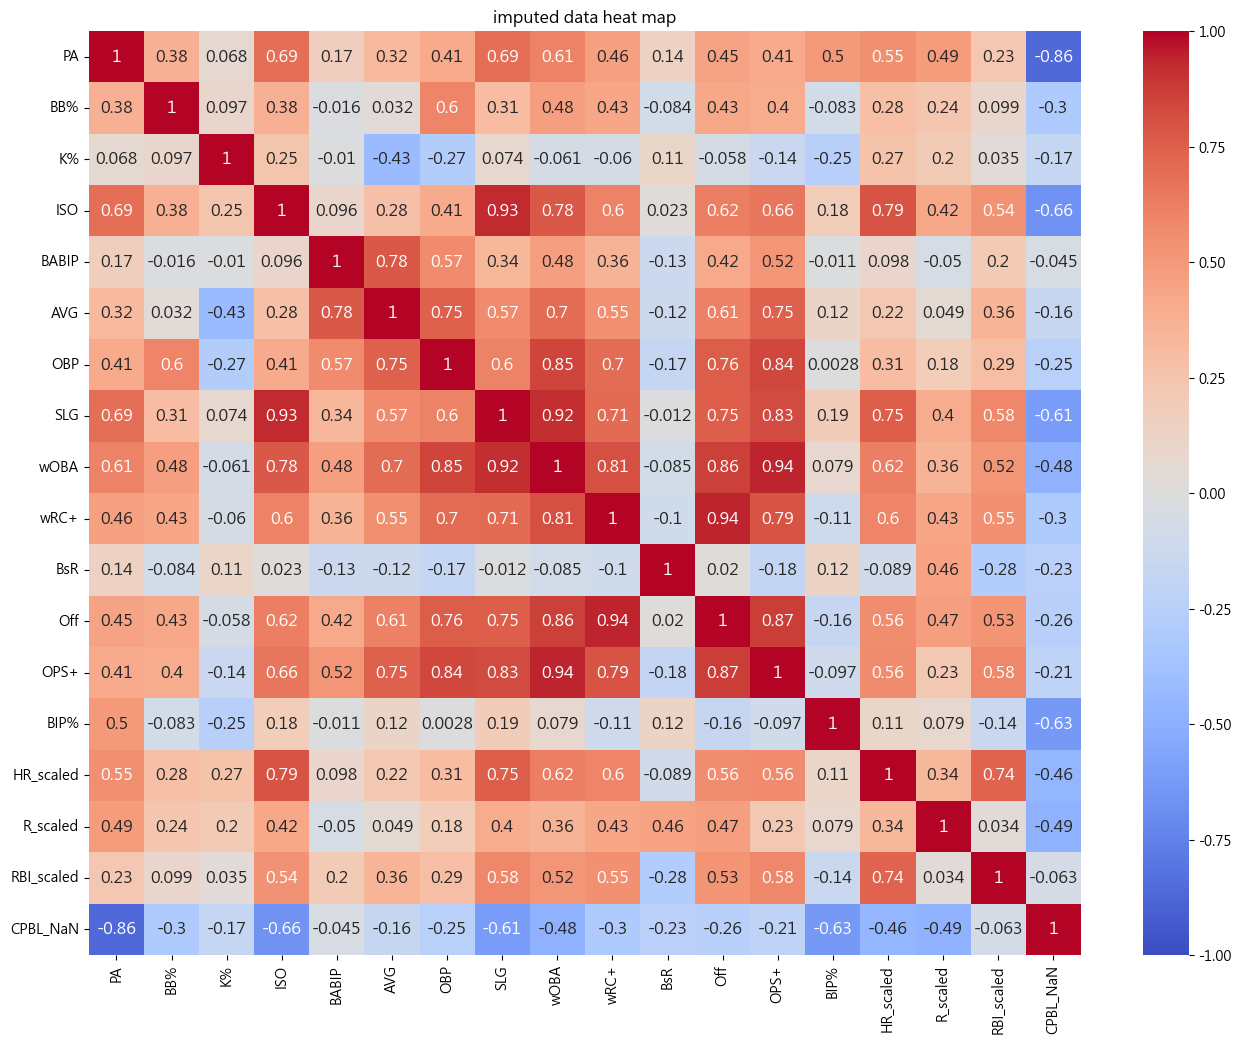

In [64]:
tool.plot_heatmap(df_imputed, 'imputed data heat map')

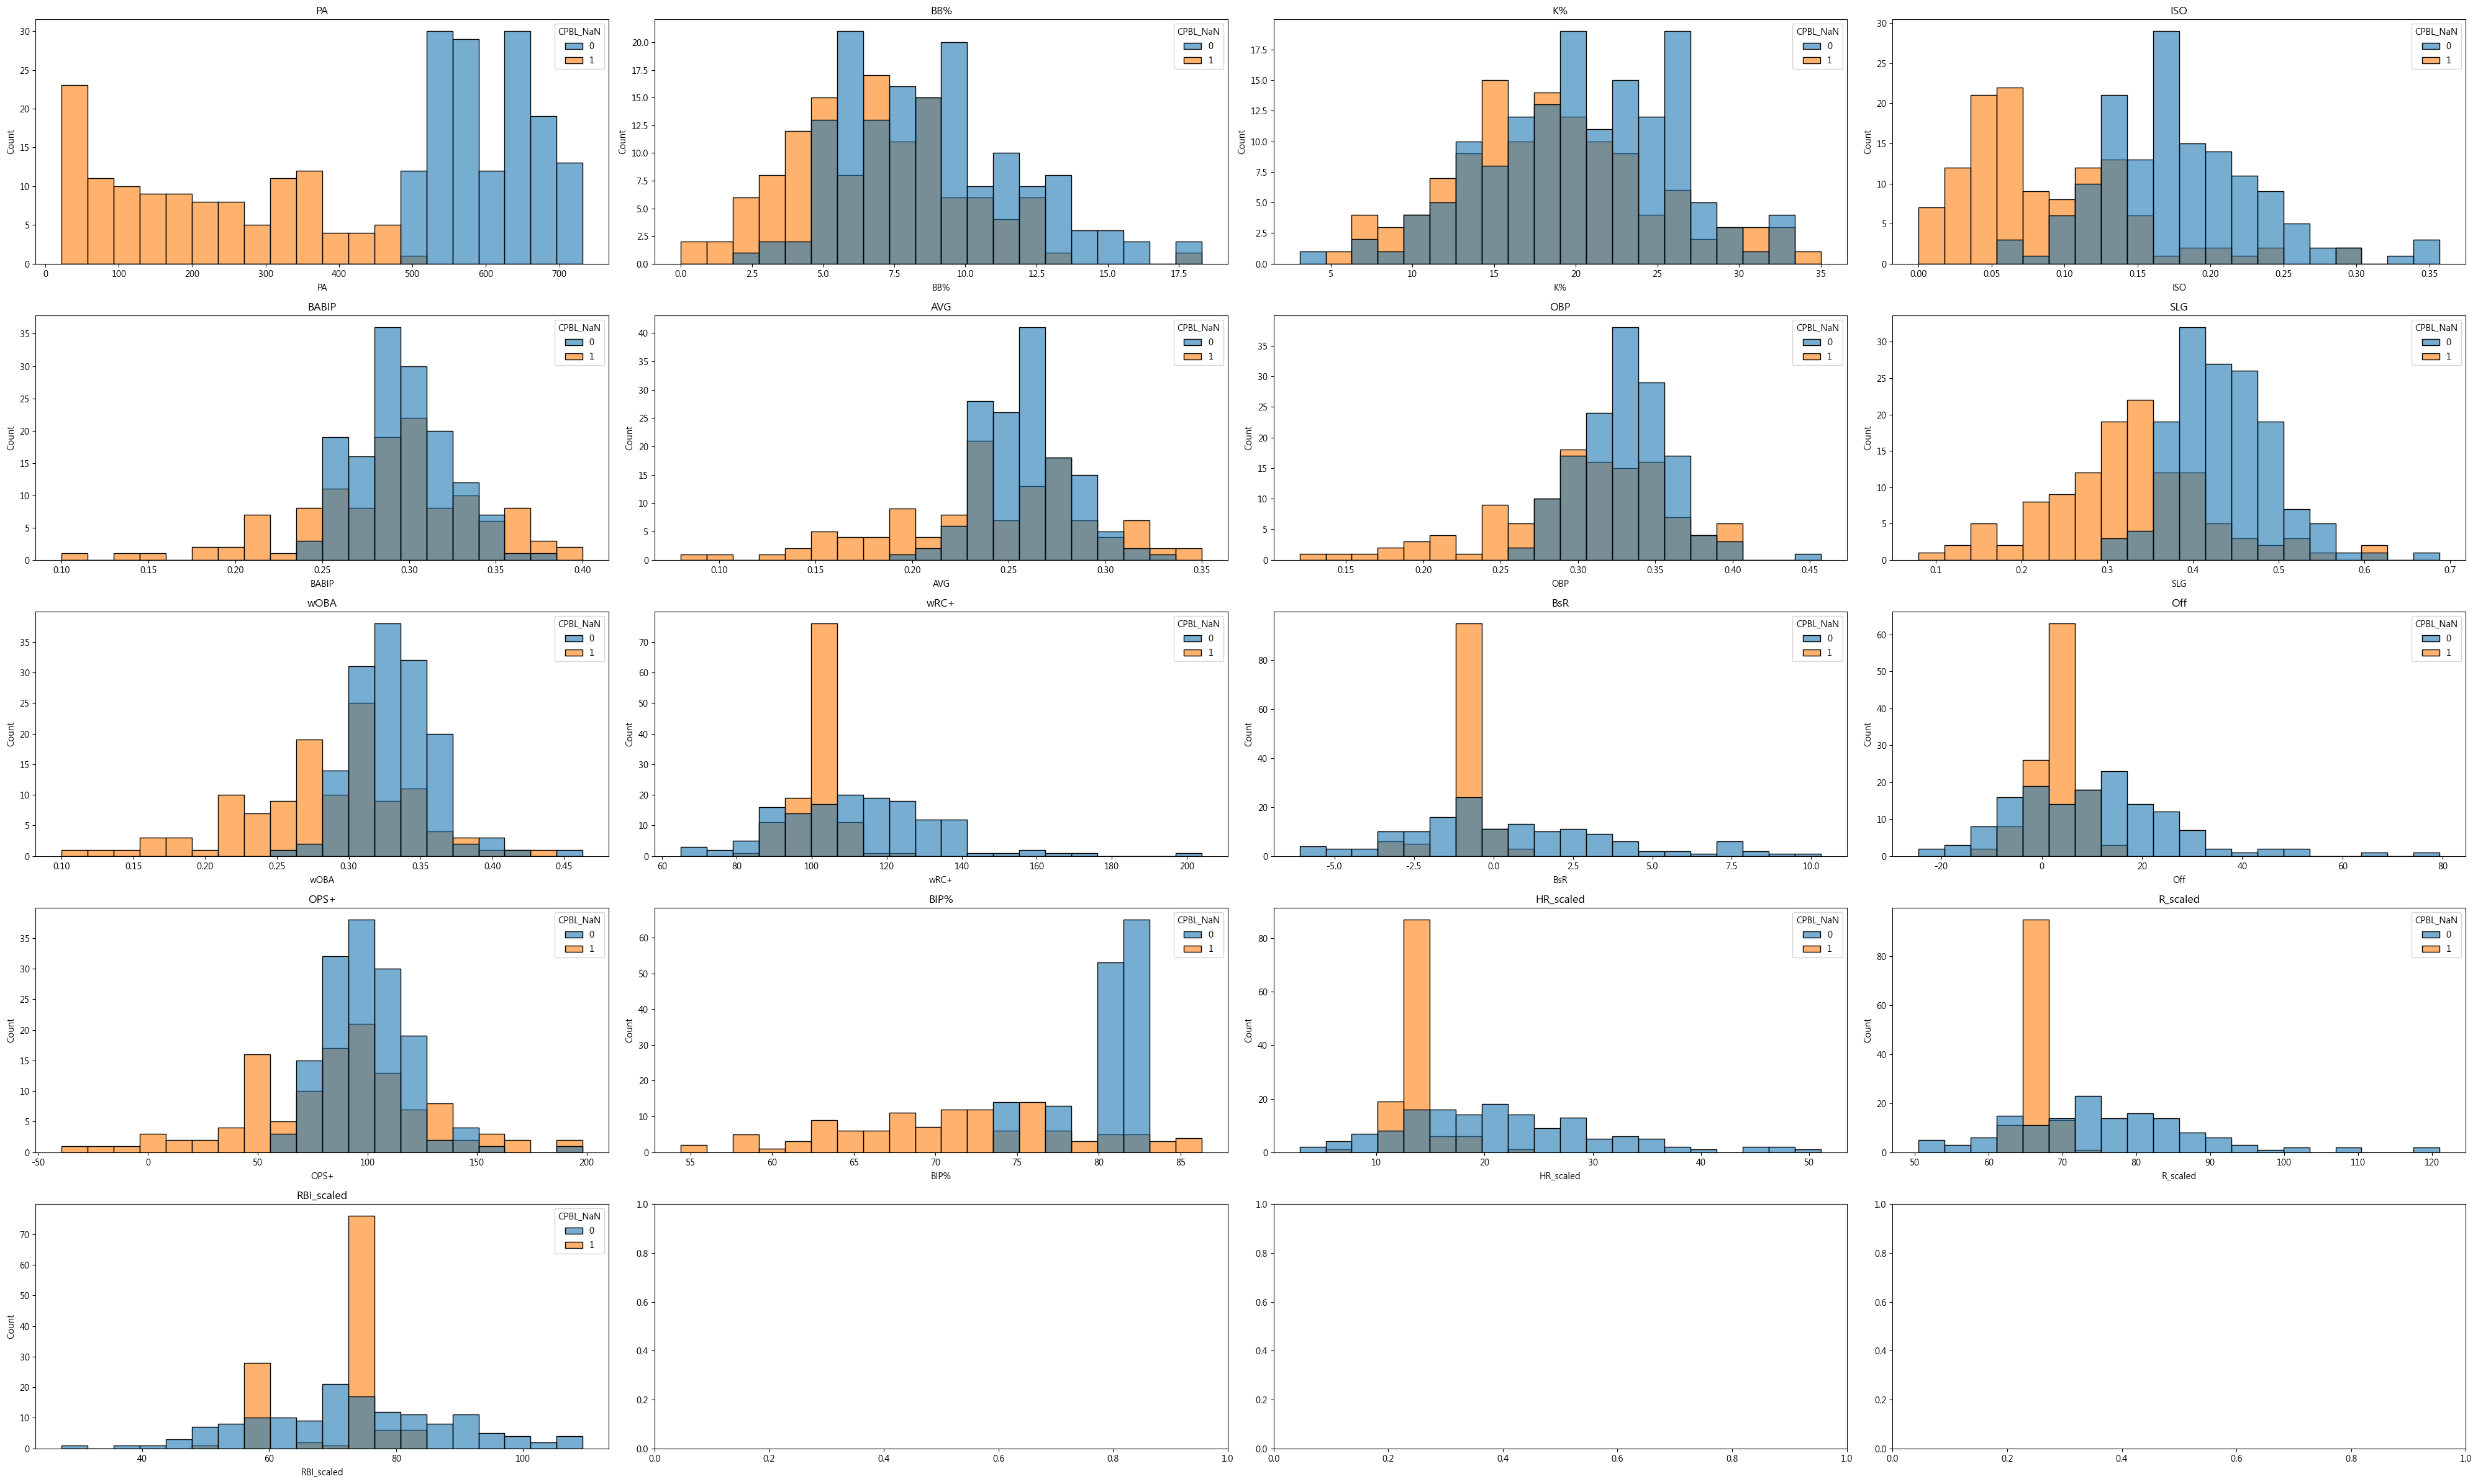

<Figure size 640x480 with 0 Axes>

In [68]:
col = [c for c in df_num.columns if c != 'CPBL_NaN']

fig, axes = plt.subplots(5, 4, figsize=(40, 24))
axes = axes.flatten()

for i, c in enumerate(col):
    sns.histplot(data=df_num, x=c, hue='CPBL_NaN', bins=20, alpha=0.6, ax=axes[i])
    axes[i].set_title(c)

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

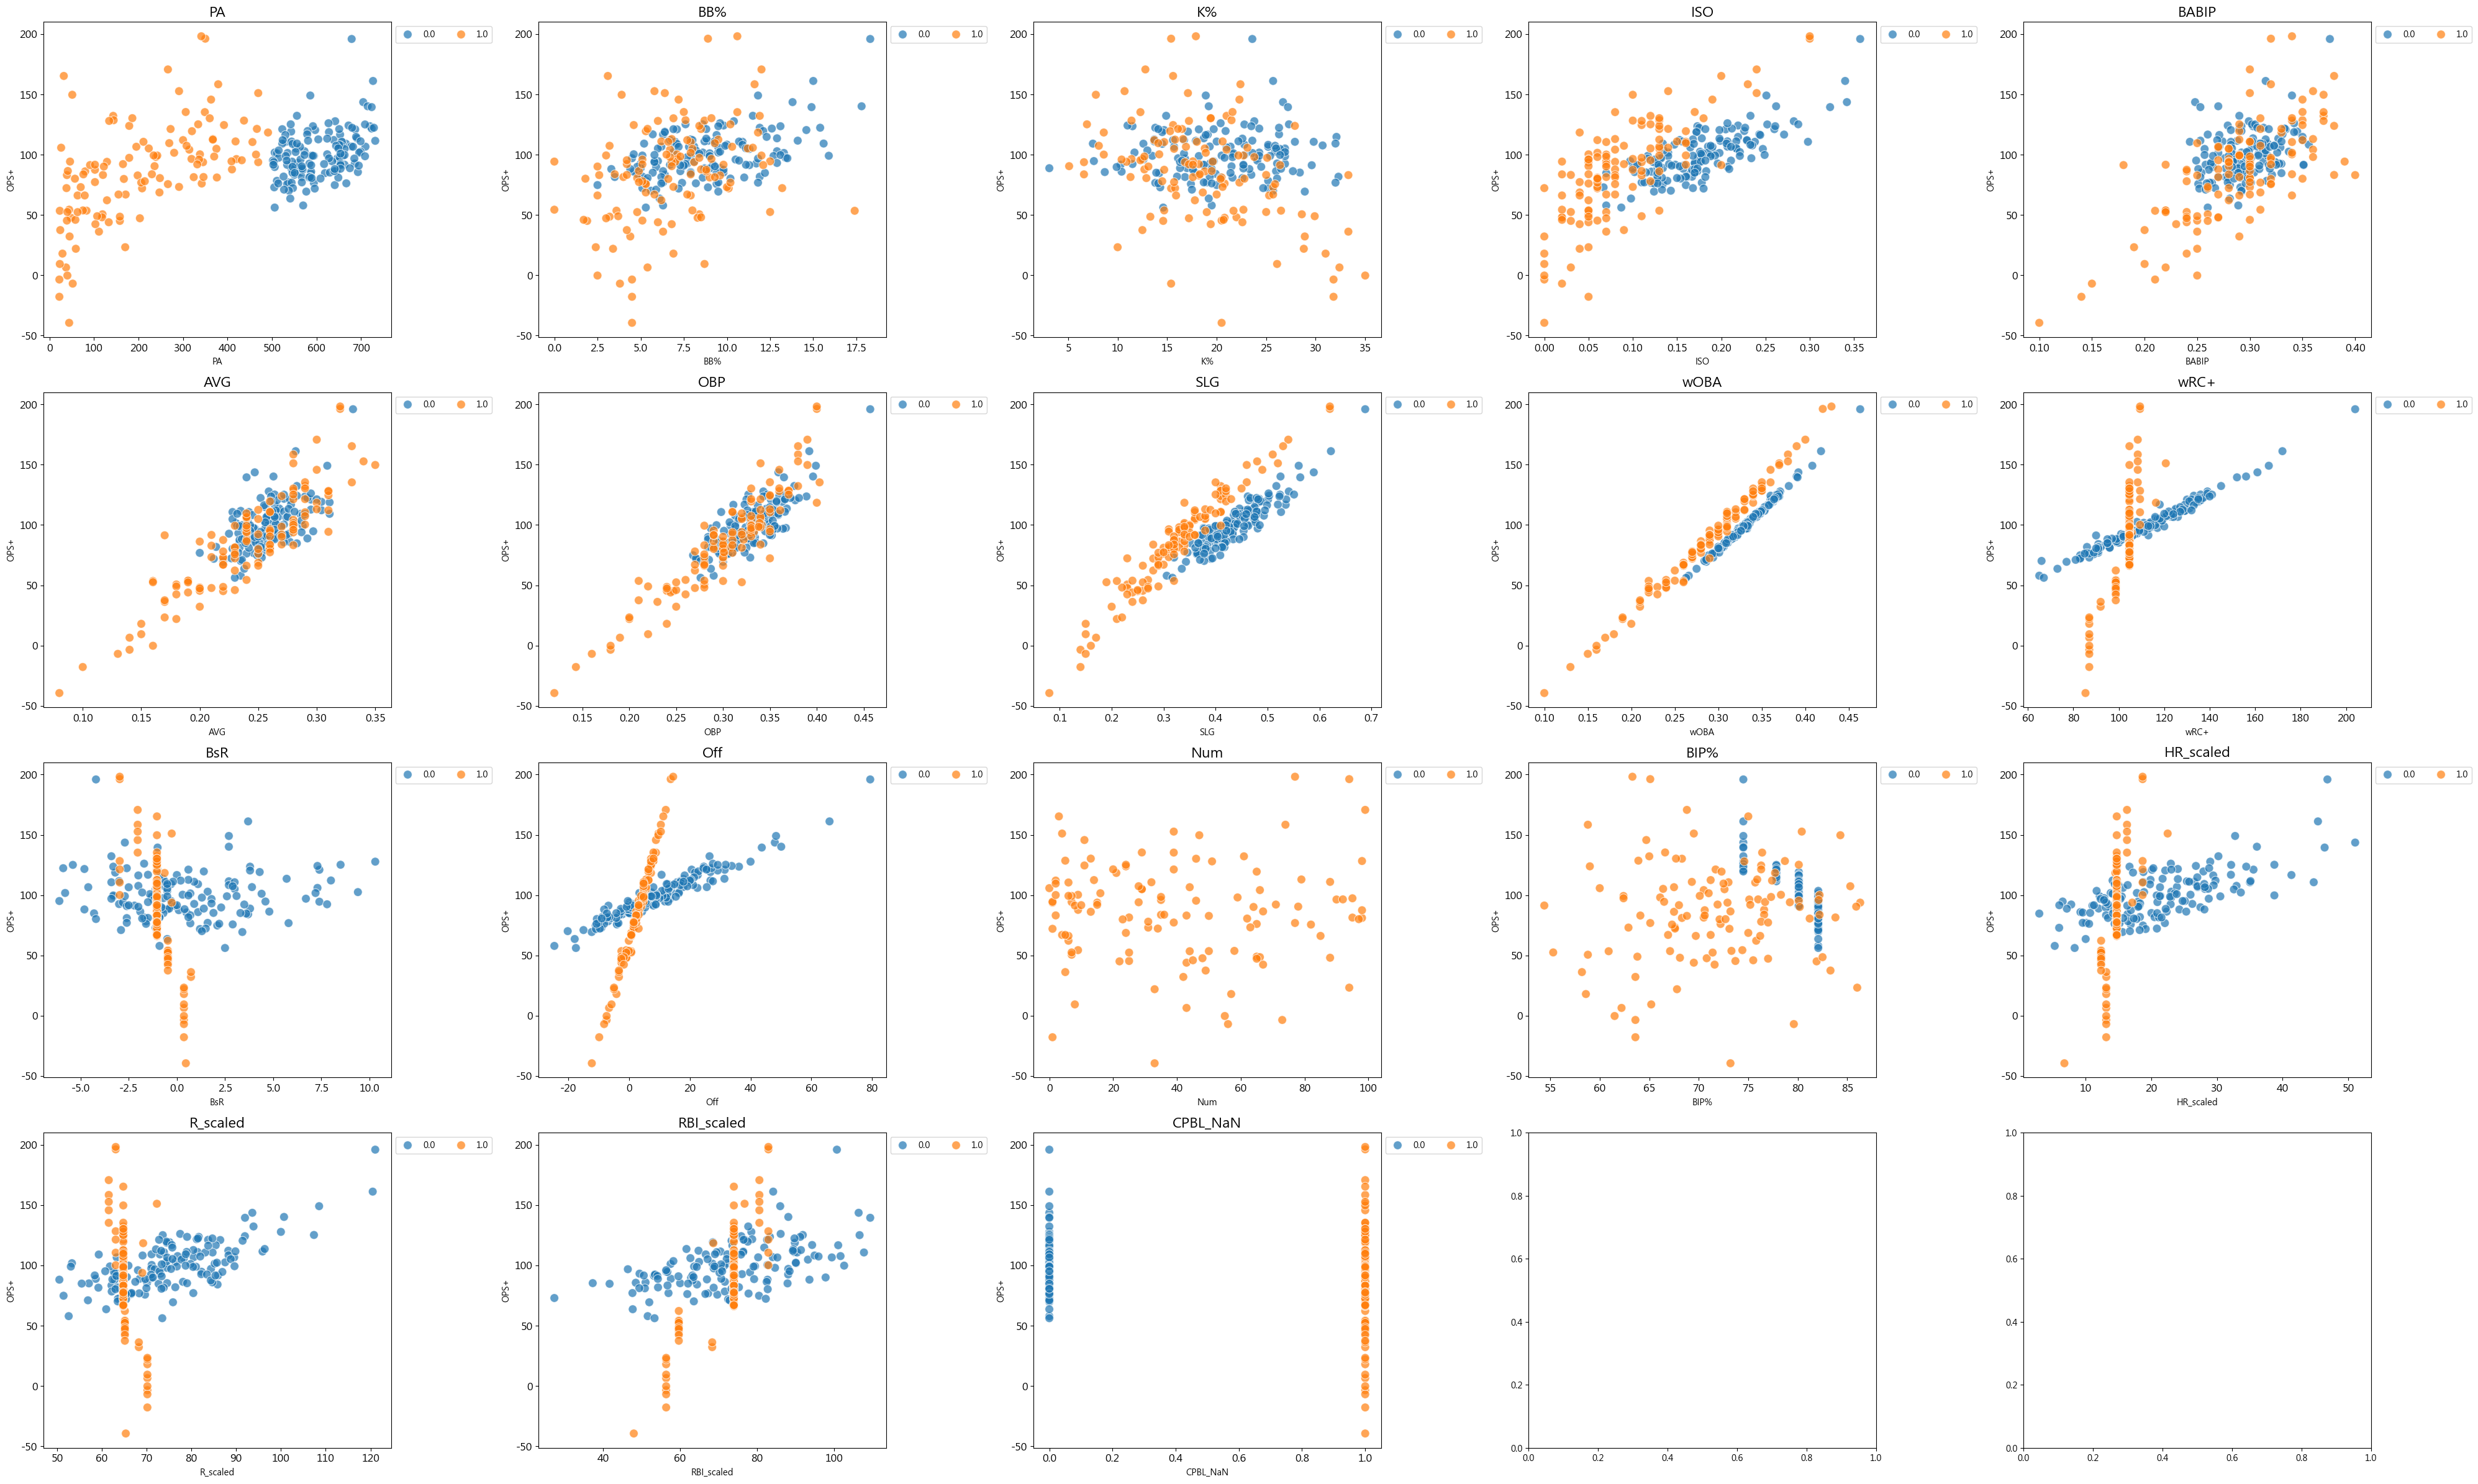

In [ ]:
col = [x for x in df.select_dtypes(include=np.number).columns 
       if x not in ['OPS+', 'Num_Ordi', 'Team_Ordi']]


fig, axes = plt.subplots(4, 5, figsize=(40, 24))


for i, j in enumerate(col):
    sns.scatterplot(
    data=df,
    x=j,
    y='OPS+',
    hue='CPBL_NaN',
    s=100,
    alpha=0.7,
    ax=axes[i//5, i%5]
    )
    axes[i//5, i%5].set_title(j, fontsize=16)
    axes[i//5, i%5].tick_params(labelsize=12)
    axes[i//5, i%5].legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()

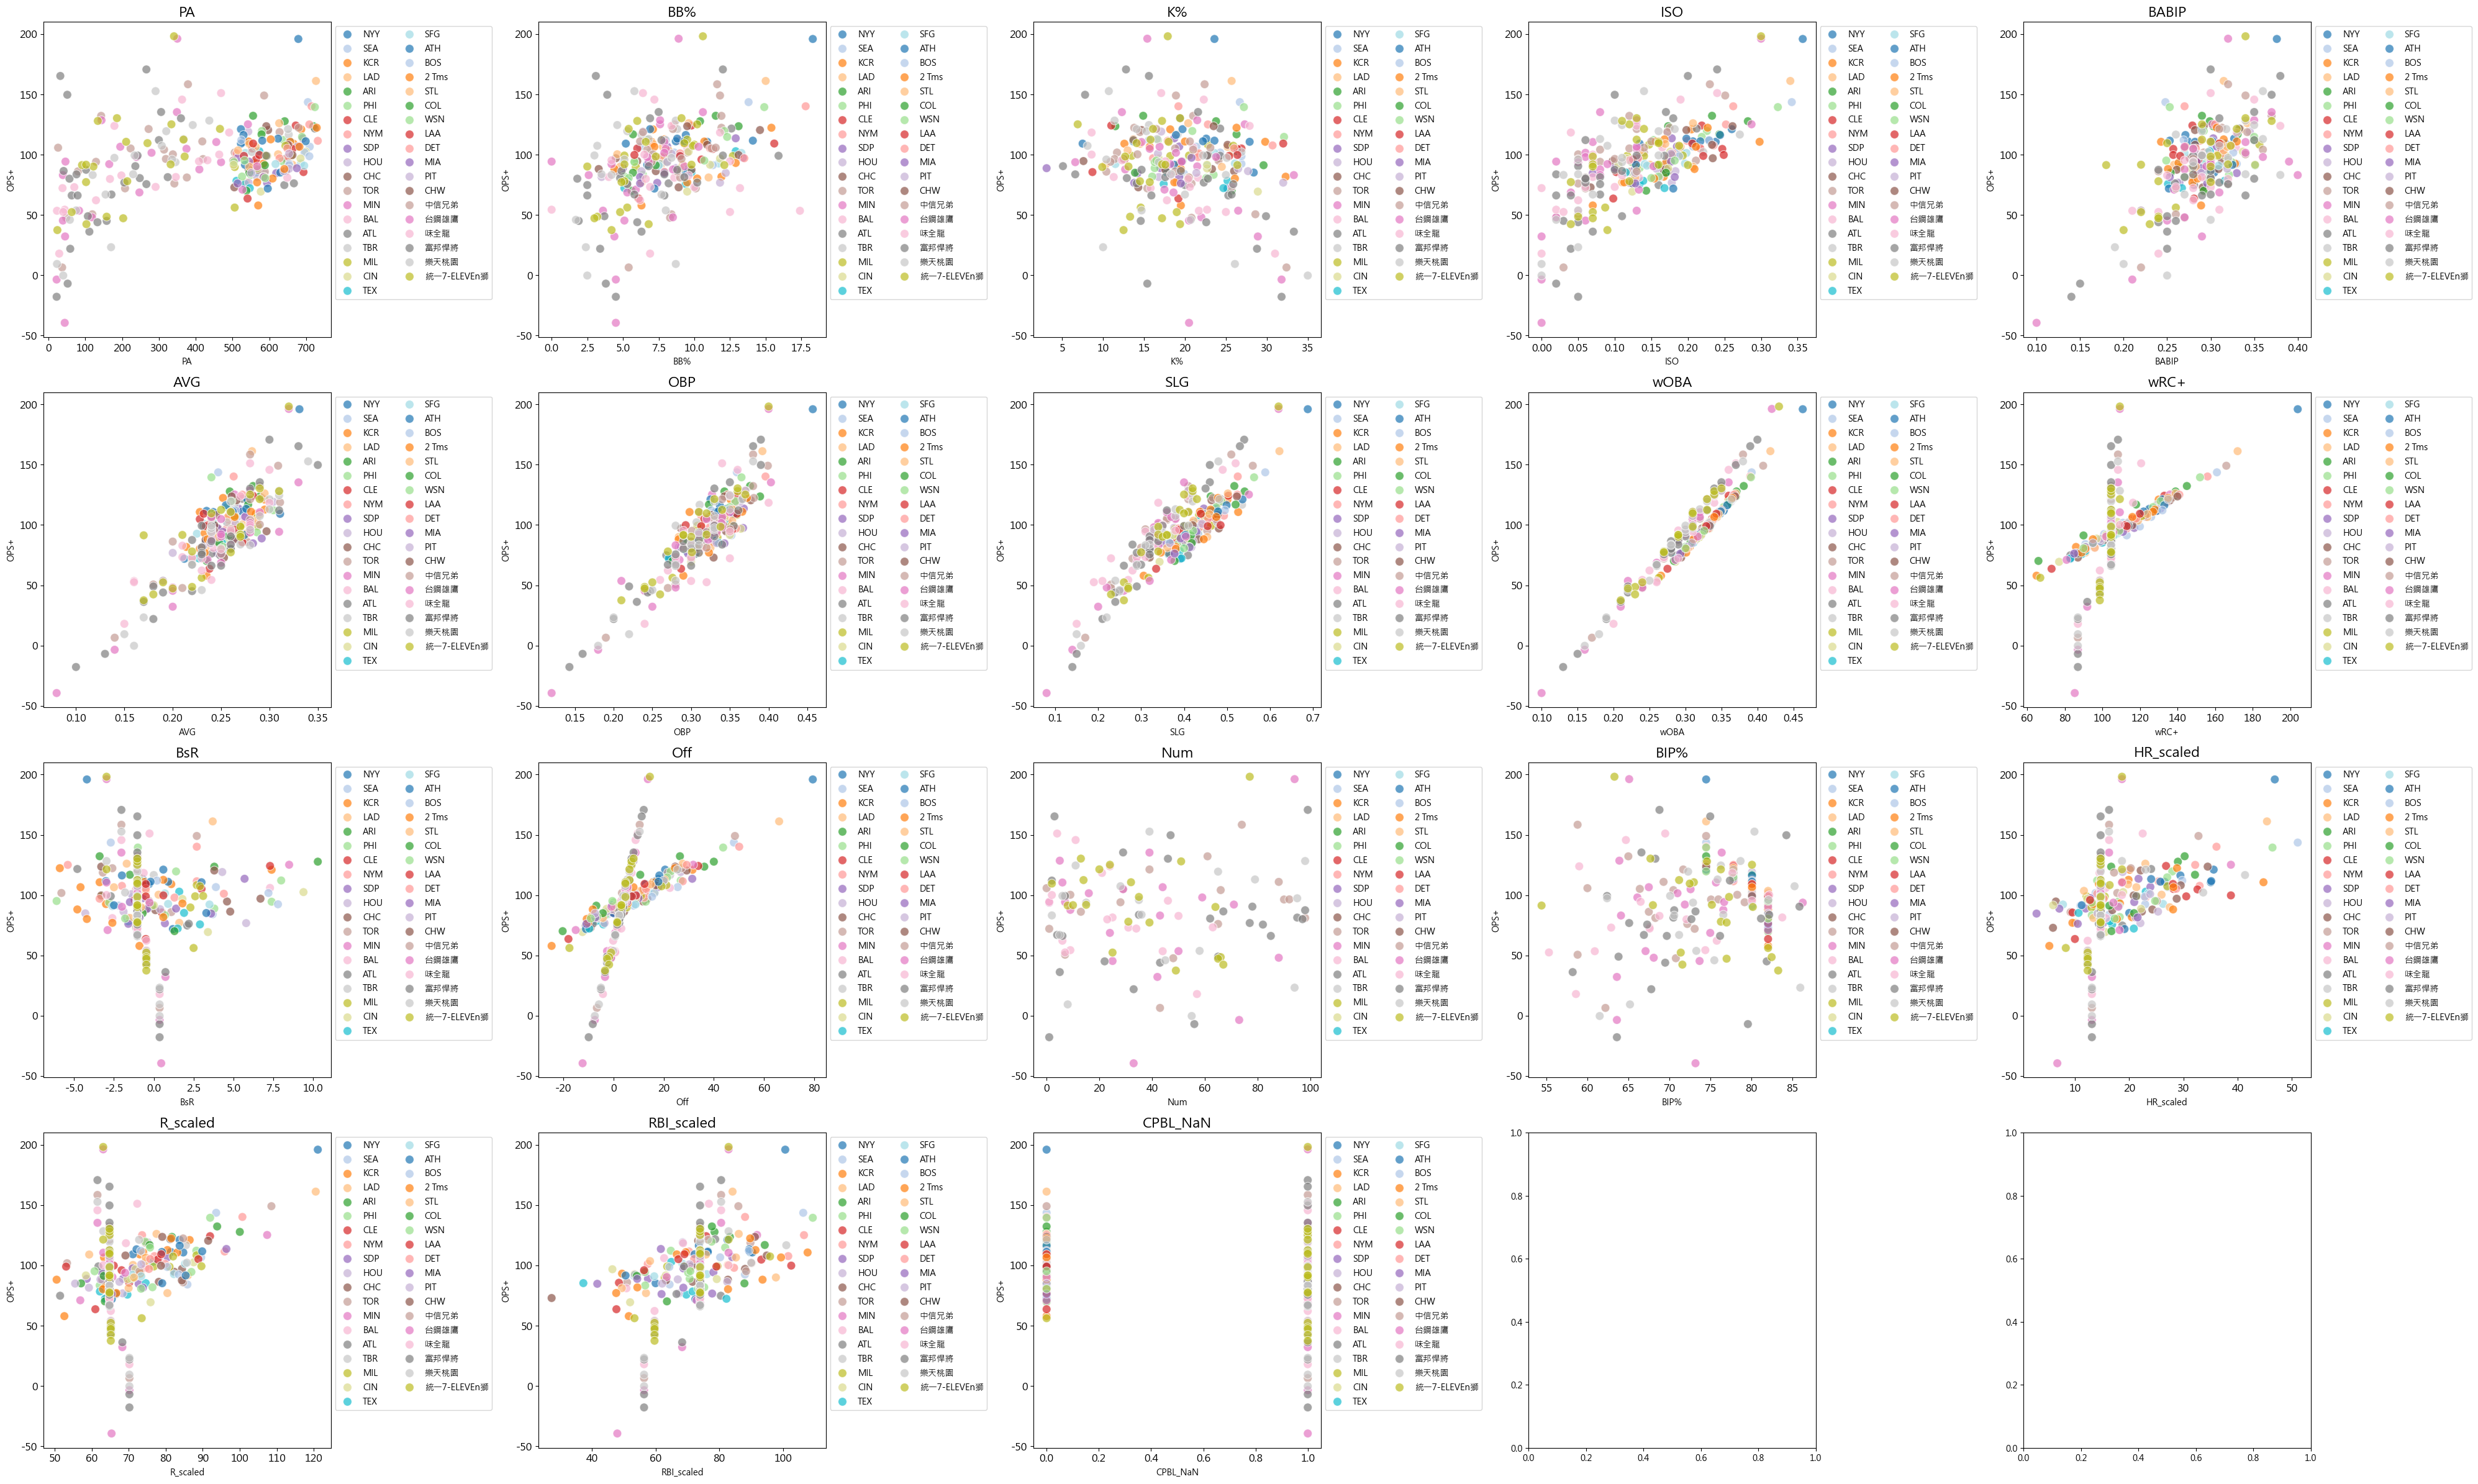

In [ ]:
col = [x for x in df.select_dtypes(include=np.number).columns 
       if x not in ['OPS+', 'Num_Ordi', 'Team_Ordi']]


fig, axes = plt.subplots(4, 5, figsize=(40, 24))
palette = sns.color_palette("tab20", n_colors=df['Team'].nunique())


for i, j in enumerate(col):
    sns.scatterplot(
    data=df,
    x=j,
    y='OPS+',
    hue='Team',
    s=100,
    palette=palette,
    alpha=0.7,
    ax=axes[i//5, i%5]
    )
    axes[i//5, i%5].set_title(j, fontsize=16)
    axes[i//5, i%5].tick_params(labelsize=12)
    axes[i//5, i%5].legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()